## **Import Libaraies**

In [ ]:
import pandas as pd # For data manipulation
import numpy as np # For basic data analysis
import matplotlib.pyplot as plt # For basic data visualization
import seaborn as sns # For more advanced visualizations
%matplotlib inline

## **Load dataset**

In [ ]:
df = pd.read_csv("Online payment fraud detection.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5341234,374,CASH_IN,347534.70,C1540151339,34461.00,381995.70,C1229201013,285145.44,0.00,0.0,0.0
5341235,374,CASH_OUT,153325.77,C673784376,11501.00,0.00,C931080505,78661.36,231987.13,0.0,0.0
5341236,374,CASH_OUT,356624.10,C287959487,24978.00,0.00,C44274353,4756039.45,5112663.55,0.0,0.0
5341237,374,TRANSFER,1007995.22,C1247132090,70173.00,0.00,C2056015998,540347.09,1548342.32,0.0,0.0


## **Data Preprocessing**

**Shape od dataset**

In [ ]:
df.shape

(5341239, 11)

 **Types of dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5341239 entries, 0 to 5341238
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 448.3+ MB


**Check null values**

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

**Remove null values**

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Describe dataset**

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5.341238e+06,5.341238e+06,5.341238e+06,5.341238e+06,5.341238e+06,5.341238e+06,5.341238e+06,5.341238e+06
mean,2.024610e+02,1.814055e+05,8.428360e+05,8.647496e+05,1.079423e+06,1.208835e+06,7.824029e-04,5.616675e-07
std,1.088839e+02,6.327558e+05,2.922660e+06,2.959474e+06,3.230759e+06,3.555776e+06,2.796052e-02,7.494447e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.370000e+02,1.331781e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.100000e+02,7.542761e+04,1.396800e+04,0.000000e+00,1.356913e+05,2.186002e+05,0.000000e+00,0.000000e+00
75%,2.980000e+02,2.096998e+05,1.075375e+05,1.455718e+05,9.461412e+05,1.119090e+06,0.000000e+00,0.000000e+00
max,3.740000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.555534e+08,3.555534e+08,1.000000e+00,1.000000e+00


 **Check Uniquea values**

In [ ]:
len(df['type'].unique())

5

In [ ]:
len(df['nameOrig'].unique())

5334596

In [ ]:
len(df['nameDest'].unique())

2278427

**Drop columns**

In [ ]:
df = df.drop(columns = ['nameOrig','nameDest'], axis=1)
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5341233,374,TRANSFER,469452.17,436.0,0.00,163304.57,632756.74,0.0,0.0
5341234,374,CASH_IN,347534.70,34461.0,381995.70,285145.44,0.00,0.0,0.0
5341235,374,CASH_OUT,153325.77,11501.0,0.00,78661.36,231987.13,0.0,0.0
5341236,374,CASH_OUT,356624.10,24978.0,0.00,4756039.45,5112663.55,0.0,0.0


**Exploring transaction type**

In [ ]:
print(df['type'].value_counts())

CASH_OUT    1889144
PAYMENT     1801048
CASH_IN     1172942
TRANSFER     443829
DEBIT         34275
Name: type, dtype: int64


In [ ]:
print(df['isFraud'].value_counts())

0.0    5337059
1.0       4179
Name: isFraud, dtype: int64


## **Distribution variable**

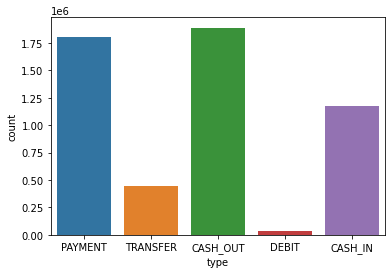

In [ ]:
sns.countplot(x='type',data=df)

Cash out and payment are the most common type of transactions.

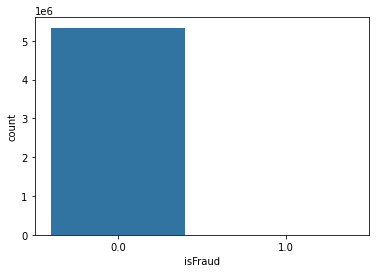

In [ ]:
sns.countplot(x='isFraud',data=df)

The above graph indicates that the dataset is highly unbalanced.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


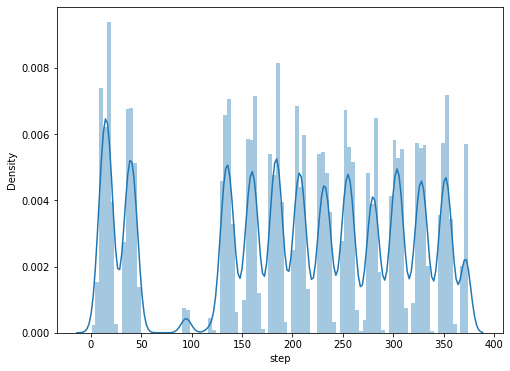

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['step'],bins=100)

The above graph indicates the distribution of the step column.

**Amount**

Let's look at the distribution of amount variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


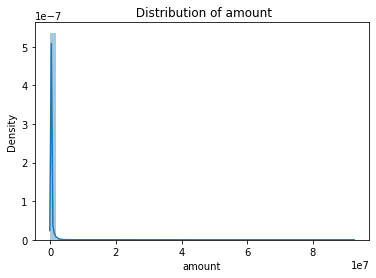

In [ ]:
plt.figure(figsize=(6, 4))
sns.distplot(df['amount'])
plt.title(' Distribution of amount')
plt.show()

The distribution of amount is left skewed

 **newbalanceOrg**

Let's look at the distribution of oldbalanceOrg variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


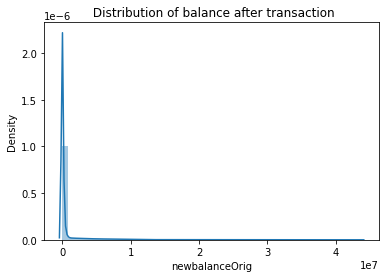

In [ ]:
plt.figure(figsize=(6, 4))
sns.distplot(df['newbalanceOrig'])
plt.title(' Distribution of balance after transaction')
plt.show()

The distribution of newbalanceOrig i s left skewed

**oldbalanceOrg**

Let's look at the distribution of oldbalanceOrg variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


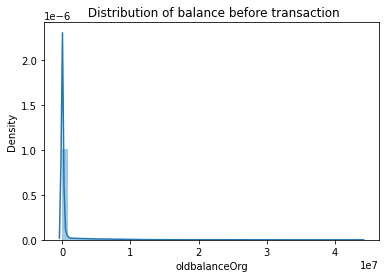

In [ ]:
plt.figure(figsize=(6, 4))
sns.distplot(df['oldbalanceOrg'])
plt.title(' Distribution of balance before transaction')
plt.show()

The distribution of oldbalanceOrg i s left skewed

Text(0, 0.5, 'isFraud')

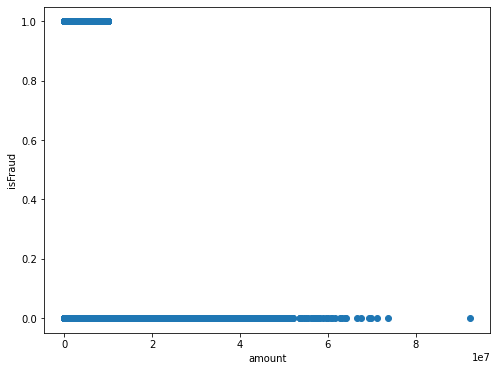

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x='amount',y='isFraud',data=df)
plt.xlabel('amount')
plt.ylabel('isFraud')

Although the amount of fraudulent transactions is very low, majority of them are constituted within 0 and 1e7 (10,000,000) amount.

Text(0, 0.5, 'isFraud')

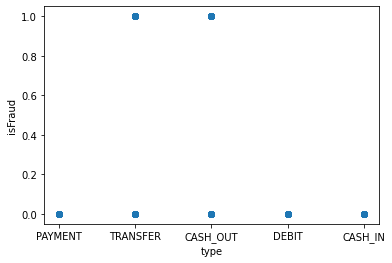

In [ ]:
plt.scatter(x='type',y='isFraud',data=df)
plt.xlabel('type')
plt.ylabel('isFraud')

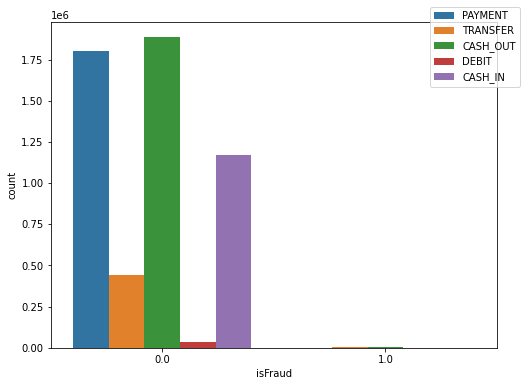

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='isFraud',data=df,hue='type')
plt.legend(loc=[0.85,0.8])

Both the above graphs indicate that transactions of the type 'transfer' and 'cash out' comprise fraudulent transactions.

## **Correlation**

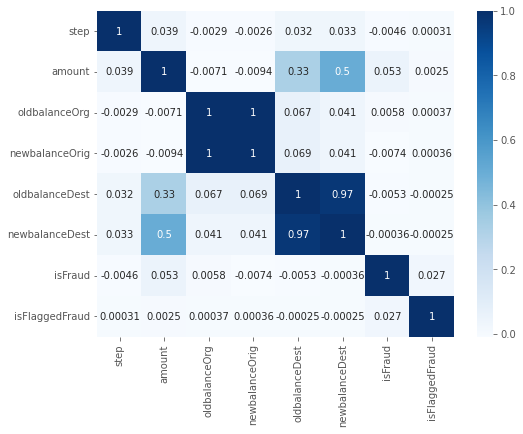

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize = (8,6))        # Size of the figure
sns.heatmap(df.corr(),annot = True,cmap="Blues")
plt.show()

show Correlation

In [ ]:
correlation = df.corr()
print(correlation['isFraud'].sort_values(ascending = False))

isFraud           1.000000
amount            0.052503
isFlaggedFraud    0.026783
oldbalanceOrg     0.005790
newbalanceDest   -0.000356
step             -0.004633
oldbalanceDest   -0.005294
newbalanceOrig   -0.007391
Name: isFraud, dtype: float64


## **Label Encoding**

Change datatypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['type'] = labelencoder.fit_transform(df['type'])
print(df['type'])

0          3
1          3
2          4
3          1
4          3
          ..
5341233    4
5341234    0
5341235    1
5341236    1
5341237    4
Name: type, Length: 5341238, dtype: int64


In [ ]:
df['isFraud']=df['isFraud'].astype('int64')

In [ ]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0.0


# **Feature Selection**

In [ ]:
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

# **Spliting the data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.10,random_state = 42)

# **Traning a machine learning modles**

**Decision Tree Classifier**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
Model = DecisionTreeClassifier()
Model.fit(x_train,y_train)
print(Model.score(x_test,y_test))

0.9997041885404887


 prediction

In [ ]:
pred = Model.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

Lets Visualize the tree

 **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
print(lr_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9997734608442983


In [ ]:
y_pred = lr_model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

 **K _Nearest Neighbours** 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
print(knn.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9996985718672069


In [ ]:
pred_y = knn.predict(x_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb =GaussianNB()

model = gnb.fit(x_train, y_train)
print(gnb.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9951546831821824


Prediction

In [ ]:
prediction = gnb.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

# **Model Evaluation**

## **Confussion matrix**

**confusion matrix of Decision tree**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


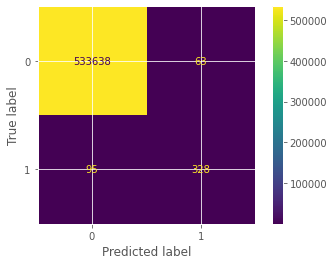

In [ ]:
import matplotlib.pyplot as plot
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(Model, x_test, y_test)  
plot.show()

**confusion matrix of Logistic regression**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


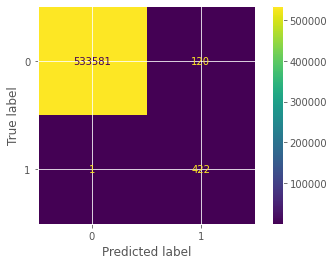

In [ ]:
plot_confusion_matrix(lr_model, x_test, y_test)  
plot.show()

**confusion matrix of K_Nearest Neighbours**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


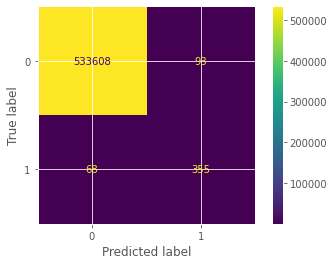

In [ ]:
plot_confusion_matrix(knn, x_test, y_test)  
plot.show()

**confusion matrix of naive bayes**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


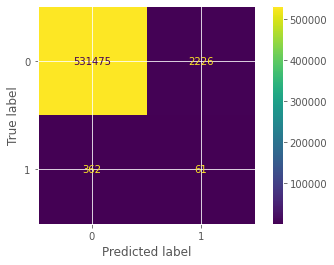

In [ ]:
plot_confusion_matrix(gnb, x_test, y_test)
plot.show()

## **Precision**

In [ ]:
# Importing the precision calculation library
from sklearn.metrics import precision_score


# Printing our results
print('Logistic Regression precision:', precision_score(y_test, y_pred))
print('Decision Tree precision:', precision_score(y_test, pred))
print('K_Nearst Naighbours precision:', precision_score(y_test, pred_y))
print('NaiveBayes precision:', precision_score(y_test, prediction))

Logistic Regression precision: 0.7785977859778598
Decision Tree precision: 0.8388746803069054
K_Nearst Naighbours precision: 0.7924107142857143
NaiveBayes precision: 0.026672496720594664


In [ ]:
print('Logistic Regression precision:', precision_score(y_test, y_pred, average=None))
print('Decision Tree precision:', precision_score(y_test, pred, average=None))
print('K_Nearst Naighbours precision:', precision_score(y_test, pred_y, average=None))
print('NaiveBayes precision:', precision_score(y_test, prediction, average=None))

Logistic Regression precision: [0.99999813 0.77859779]
Decision Tree precision: [0.99982201 0.83887468]
K_Nearst Naighbours precision: [0.99987258 0.79241071]
NaiveBayes precision: [0.99931934 0.0266725 ]


## **Recall**

In [ ]:
# Importing the recall calculation library
from sklearn.metrics import recall_score


# Printing our results
print('Logistic Regression Recall:', recall_score(y_test, y_pred))
print('Decision Tree Recall:', recall_score(y_test, pred))
print('K_Nearst Naighbours Recall:', recall_score(y_test, pred_y))
print('NaiveBayes Recall:', recall_score(y_test, prediction))

Logistic Regression Recall: 0.9976359338061466
Decision Tree Recall: 0.7754137115839244
K_Nearst Naighbours Recall: 0.8392434988179669
NaiveBayes Recall: 0.14420803782505912


In [ ]:
print('Logistic Regression Recall:', recall_score(y_test, y_pred, average=None))
print('Decision Tree Recall:', recall_score(y_test, pred, average=None))
print('K_Nearst Naighbours Recall:', recall_score(y_test, pred_y, average=None))
print('NaiveBayes Recall:', recall_score(y_test, prediction, average=None))

Logistic Regression Recall: [0.99977516 0.99763593]
Decision Tree Recall: [0.99988196 0.77541371]
K_Nearst Naighbours Recall: [0.99982575 0.8392435 ]
NaiveBayes Recall: [0.99582913 0.14420804]


## **F1 Score**

In [ ]:
from sklearn.metrics import f1_score
#print macro
print('Logistic Regression f1_score:',f1_score(y_test, y_pred, average = 'macro'))
print('Decision Tree f1_score:', f1_score(y_test, pred, average = 'macro'))
print('K_Nearst Naighbours f1_score:', f1_score(y_test, pred_y,average = 'macro'))
print('NaiveBayes f1_score:', f1_score(y_test, prediction,average = 'macro'))

Logistic Regression f1_score: 0.9372490134857425
Decision Tree f1_score: 0.9028743936888142
K_Nearst Naighbours f1_score: 0.9075020786037606
NaiveBayes f1_score: 0.5212948150946722


In [ ]:
#print micro
print('Logistic Regression f1_score:',f1_score(y_test, y_pred, average = 'micro'))
print('Decision Tree f1_score:', f1_score(y_test, pred, average = 'micro'))
print('K_Nearst Naighbours f1_score:', f1_score(y_test, pred_y,average = 'micro'))
print('NaiveBayes f1_score:', f1_score(y_test, prediction,average = 'micro'))

Logistic Regression f1_score: 0.9997734608442983
Decision Tree f1_score: 0.9997041885404887
K_Nearst Naighbours f1_score: 0.9996985718672069
NaiveBayes f1_score: 0.9951546831821824
